# Introduction to Fourier Transforms

-----

In this notebook, we introduce fourier transforms.

-----


## Table of Contents


[Simple Signal](#Simple-Signal)

[Complex Signal](#Complex-Signal)

[Compound Signal](#Compound-Signal)

[Complex Signal with Noise](#Complex-Signal-with-Noise)

-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)


## Simple Signal

-----

In [2]:
time = np.linspace(0, 10, 256)
delta_time = time[1] - time[0]
print(f'Time Delta = {delta_time:4.3f} seconds')

Time Delta = 0.039 seconds


In [3]:
# Unit frequency signal
y = np.cos(2 * np.pi * time)

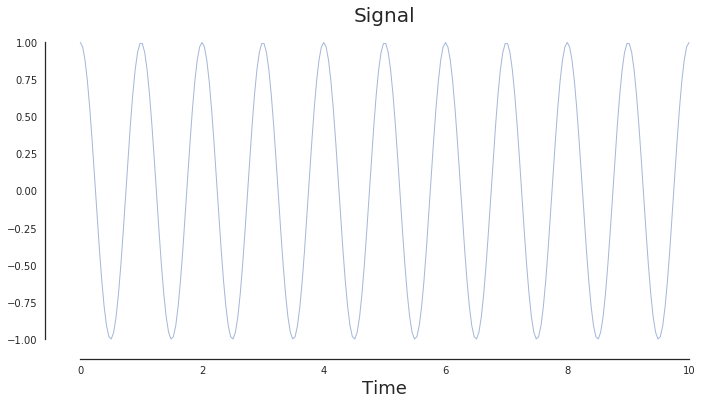

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time, y, lw=1, alpha=0.5)

ax.set(title='Signal',
      xlabel='Time')

sns.despine(offset=5, trim=True)

In [5]:
# Compute FFT
yf = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d = delta_time)

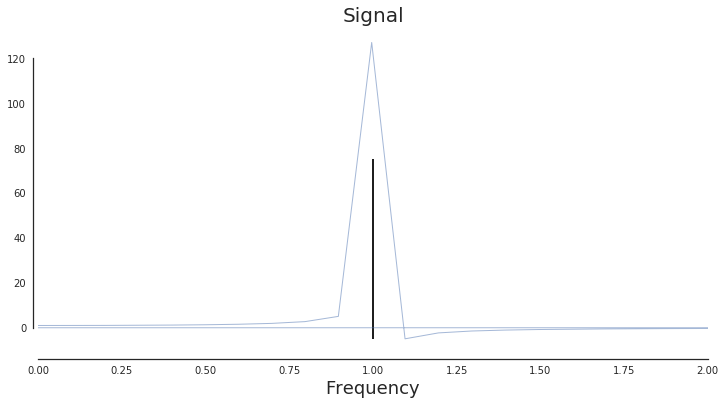

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(freq, yf, lw=1, alpha=0.5)
ax.vlines(1, -5, 75)
ax.set(title='Signal',
      xlabel='Frequency', xlim=(0, 2))

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)


## Complex Signal

-----

In [7]:
# More complex signal
y = np.cos(2 * np.pi * time) + np.sin(2 * 2 * np.pi * time)

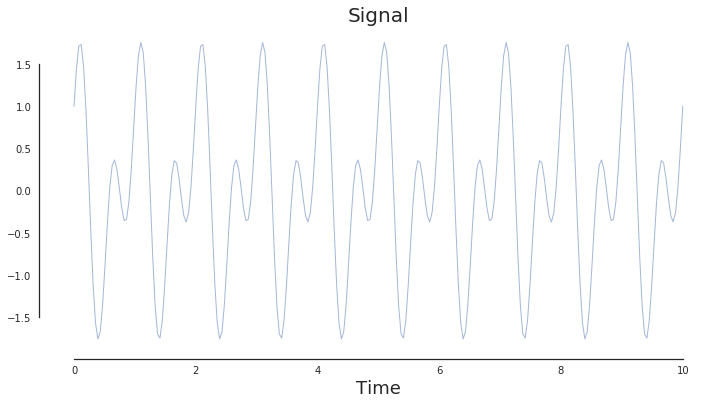

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time, y, lw=1, alpha=0.5)

ax.set(title='Signal',
      xlabel='Time')

sns.despine(offset=5, trim=True)

In [9]:
# Compute FFT
yf = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d = delta_time)

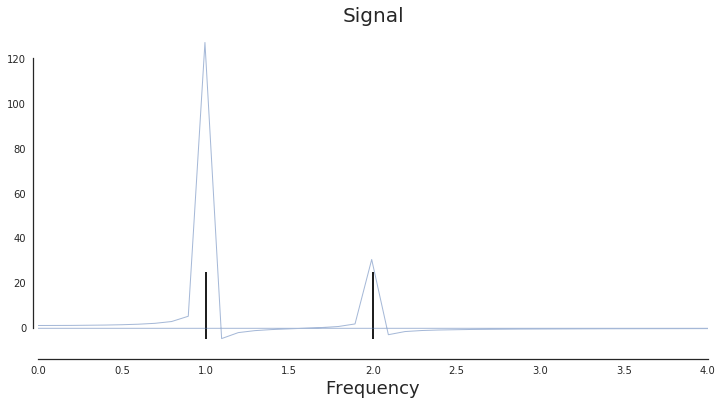

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(freq, yf, lw=1, alpha=0.5)
ax.vlines([1, 2], -5, 25)
ax.set(title='Signal',
      xlabel='Frequency', xlim=(0, 4))

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Compound Signal

-----

In [11]:
y = np.cos(2 * np.pi * time) * np.sin(2 * 3 * np.pi * time)

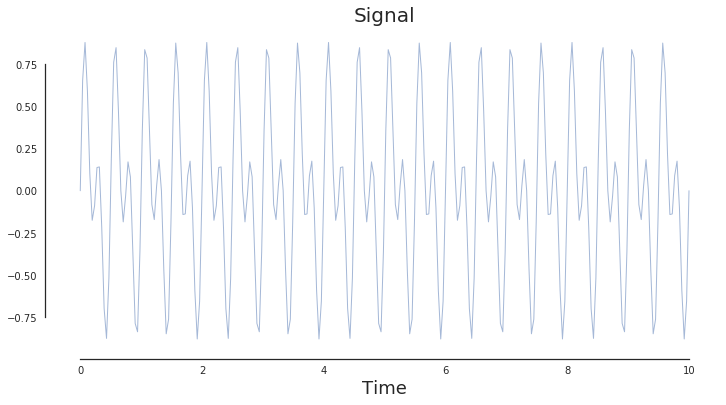

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time, y, lw=1, alpha=0.5)

ax.set(title='Signal',
      xlabel='Time')

sns.despine(offset=5, trim=True)

In [13]:
yf = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d = delta_time)

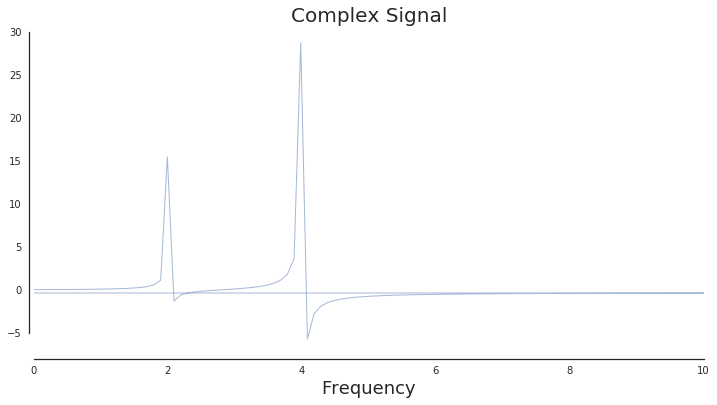

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(freq, yf, lw=1, alpha=0.5)

ax.set(title='Complex Signal',
      xlabel='Frequency', xlim=(0, 10))

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Complex Signal with Noise

-----

In [15]:
# More complex signal
y = np.cos(2 * np.pi * time) + np.sin(2 * 2 * np.pi * time) + np.random.rand(time.shape[0])

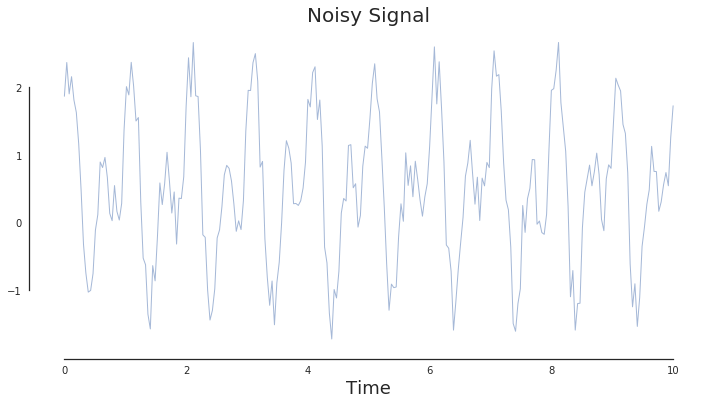

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time, y, lw=1, alpha=0.5)

ax.set(title='Noisy Signal',
      xlabel='Time')

sns.despine(offset=5, trim=True)

In [17]:
yf = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d = delta_time)

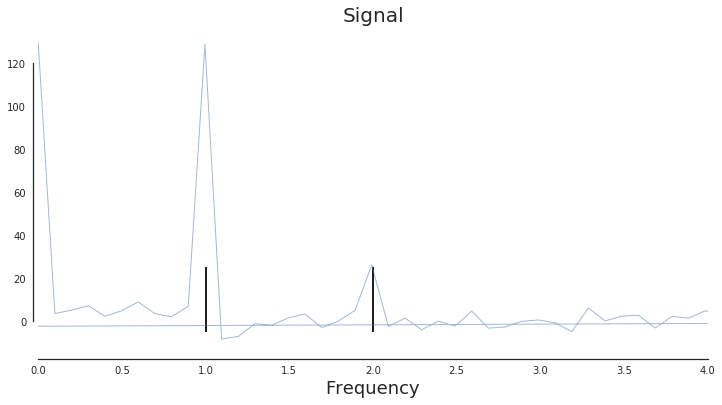

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(freq, yf, lw=1, alpha=0.5)
ax.vlines([1, 2], -5, 25)
ax.set(title='Signal',
      xlabel='Frequency', xlim=(0, 4))

sns.despine(offset=5, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced XXX and used this approach to fit a model to data with uncertainty. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the 
1. Change the 
2. Try using a
3. Try changing 

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

12. Wikipedia article on [Fourier analysis][wfa]
2. Tutorial on [Fourier Transform][begft]
3. Python based [Introduction to the Fast Fourier Transform][tfft]
4. Understanding the [Fast Fourier Transform][efft] with Python
5. Tutorial on [Fourier analysis][tfa] 

-----

[wfa]: https://en.wikipedia.org/wiki/Fourier_analysis

[qna]: https://www.quantstart.com/articles/White-Noise-and-Random-Walks-in-Time-Series-Analysis

[bfa]: https://www.safaribooksonline.com/library/view/elegant-scipy/9781491922927/ch04.html

[begft]: https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

[tfft]: https://jeremykun.com/2012/07/18/the-fast-fourier-transform/

[efft]: https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

[sfft]: https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html

[tfa]: https://www.gaussianwaves.com/2013/05/a-tutorial-on-fourier-analysis-fourier-series/

[fssw]: http://firsttimeprogrammer.blogspot.com/2015/04/fourier-series-and-square-wave.html

[pfam]: https://www.plot.ly/matplotlib/fft/

[faps]: http://linuxgazette.net/115/andreasen.html (Sunspots FFT)

[fap]: https://www.asee.org/public/conferences/56/papers/12461/download

[pfsp]: https://glowingpython.blogspot.com/2011/08/how-to-plot-frequency-spectrum-with.html

[bspp]: http://samcarcagno.altervista.org/blog/basic-sound-processing-python/

[wrp]: http://jseabold.net/blog/2012/02/23/wavelet-regression-in-python/

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode